In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle as p
import requests

In [2]:
df = pd.read_csv("df_raw.csv")
df_cleaned = pd.read_csv("df_cleaned.csv")

In [3]:
not_in_cleaned = df[~df.website.isin(df_cleaned.website)]

In [4]:
not_in_cleaned.groupby("label").size()

label
APPROVED    130
REJECTED     21
dtype: int64

In [5]:
not_in_cleaned_filtered = not_in_cleaned.iloc[:, 1:].iloc[:,1:8].reset_index(drop=True)

In [6]:
data = not_in_cleaned_filtered.to_json()

In [7]:
url = 'http://127.0.0.1:5000/api/v1/model'

In [8]:
columns = ['broken_link_score', 'link_contact_us_exist', 'cu_email_exist',\
    'cu_phone_number_exist', 'link_about_us_exist', 'link_tnc_exist',\
    'tnc_refund_policy_exist']

In [9]:
headers = {'content-type': 'application/json', 'Accept-Charset': 'UTF-8'}

In [10]:
res = requests.post(url, data=data, headers=headers).text

In [11]:
not_in_cleaned['score'] = res[1:-1].split()

c:\users\bahyh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


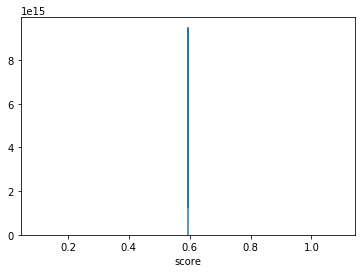

In [12]:
sns.distplot(not_in_cleaned[not_in_cleaned.label == 'APPROVED']['score'])
plt.show()

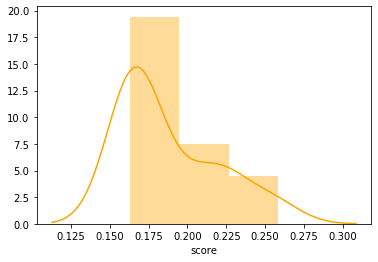

In [13]:
sns.distplot(not_in_cleaned[not_in_cleaned.label == 'REJECTED']['score'], color='orange')
plt.show()